In [847]:
import cv2
import skimage

import matplotlib.pyplot as plt
import numpy as np

In [848]:
def show_cropped_square(image):
   
    
    th, output_im = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((9, 9), dtype="uint8")
    im_d = cv2.dilate(output_im, kernel, iterations=1)
    im_closing = cv2.erode(im_d, kernel, iterations=10)
    edges = cv2.Canny(im_closing, threshold1=100, threshold2=240)
    
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    im = cv2.drawContours(image, contours, contourIdx=-1, color=(0, 255, 0), thickness=2)
    im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    largest_contour = max(contours, key=cv2.contourArea)
    
    x, y, w, h = cv2.boundingRect(largest_contour)

    max_side = max(w, h)
    center_x = x + w // 2
    center_y = y + h // 2
    x = center_x - max_side // 2
    y = center_y - max_side // 2
    
        
    cropped_square = image[y:y + max_side, x:x + max_side]

    
    print(cropped_square.shape)
   
    plt.imshow(cv2.cvtColor(cropped_square, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return cropped_square

In [849]:
plant_1 = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task3\Plants\plants_1.png")
plant_2 = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task3\Plants\plants_2.png")

(2847, 2847, 3)


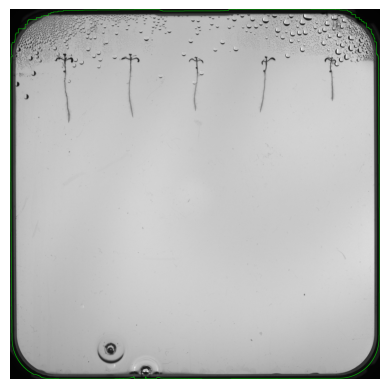

(2847, 2847, 3)


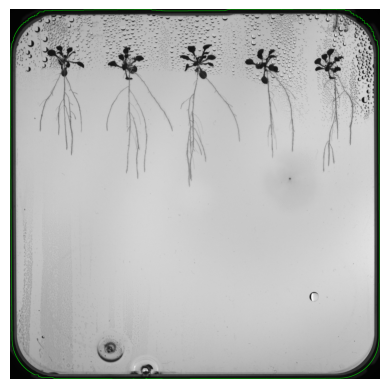

In [850]:
plant_1 = show_cropped_square(plant_1)
plant_2 = show_cropped_square(plant_2)

In [851]:
def Segmenting_individual_plants(image):

    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.medianBlur(image, 5)
    image = image[230:-300, 200:-130]
    
    th, thresholded = cv2.threshold(image, 165, 255, cv2.THRESH_BINARY_INV)
    retval, labels = cv2.connectedComponents(thresholded)

    # Filter connected components to keep only the five largest objects
    sizes = [np.sum(labels == i) for i in range(1, retval)]
    largest_indices = np.argsort(sizes)[::-1][:5]  # Indices of the largest five components

    # Create a mask to select only the five largest components on the thresholded image
    mask_thresholded = np.zeros_like(thresholded, dtype=np.uint8)
    for idx in largest_indices:
        mask_thresholded[labels == idx + 1] = 255  # Set pixels belonging to the five largest components to white

    # Apply the mask to the thresholded image
    masked_thresholded = cv2.bitwise_and(thresholded, thresholded, mask=mask_thresholded)

    retval, labels = cv2.connectedComponents(masked_thresholded)
    plt.imshow(labels)
    plt.colorbar()
    



    

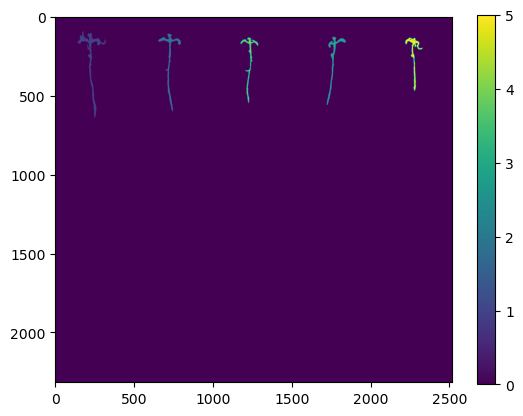

In [852]:
Segmenting_individual_plants(plant_1)

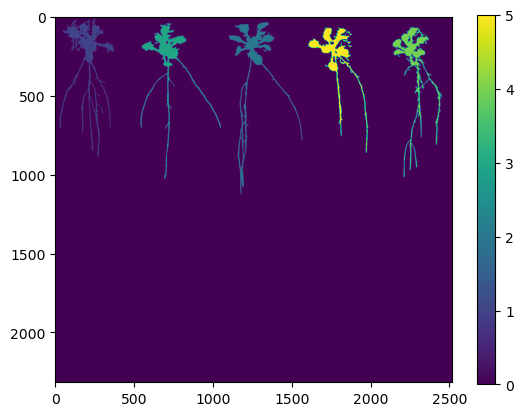

In [853]:
Segmenting_individual_plants(plant_2)

---

### Whole proces of learning and creating a funcion

### Plant 1

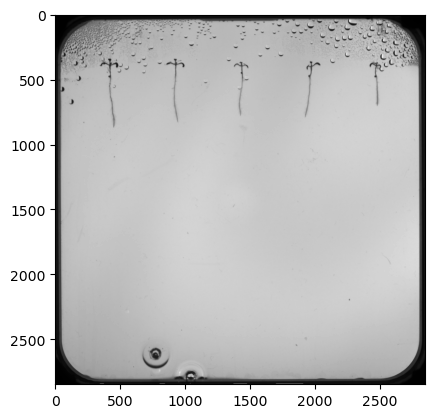

In [854]:
plant_1 = cv2.cvtColor(plant_1, cv2.COLOR_BGR2GRAY)
plant_1 = cv2.medianBlur(plant_1, 5)

kernel = np.ones((5, 5), dtype="uint8")
plant_1 = cv2.erode(plant_1, kernel, iterations=1)
plant_1 = cv2.dilate(plant_1, kernel, iterations=1)
plt.imshow(plant_1, cmap='gray')

In [855]:
plant_1 = plant_1[100:-200, 100:-100]

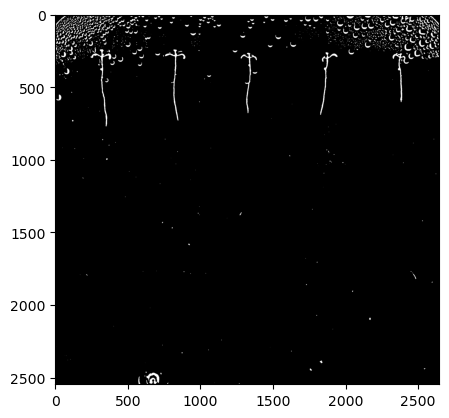

In [856]:
block_size = 33  # Size of the neighborhood for thresholding
c = 12  # Constant subtracted from the mean

# Apply adaptive thresholding
thresholded = cv2.adaptiveThreshold(plant_1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, block_size, c)

plt.imshow(thresholded, cmap='gray')

In [857]:
retval, labels = cv2.connectedComponents(thresholded)

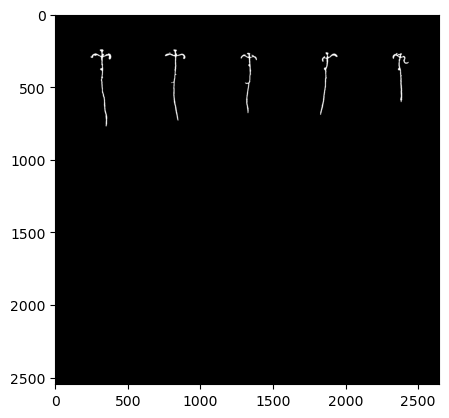

In [858]:
# Filter connected components to keep only the five largest objects
sizes = [np.sum(labels == i) for i in range(1, retval)]
largest_indices = np.argsort(sizes)[::-1][:5]  # Indices of the largest five components

# Create a mask to select only the five largest components on the thresholded image
mask_thresholded = np.zeros_like(thresholded, dtype=np.uint8)
for idx in largest_indices:
    mask_thresholded[labels == idx + 1] = 255  # Set pixels belonging to the five largest components to white

# Apply the mask to the thresholded image
masked_thresholded = cv2.bitwise_and(thresholded, thresholded, mask=mask_thresholded)

plt.imshow(masked_thresholded, cmap='gray')

In [859]:
retval, labels = cv2.connectedComponents(masked_thresholded)

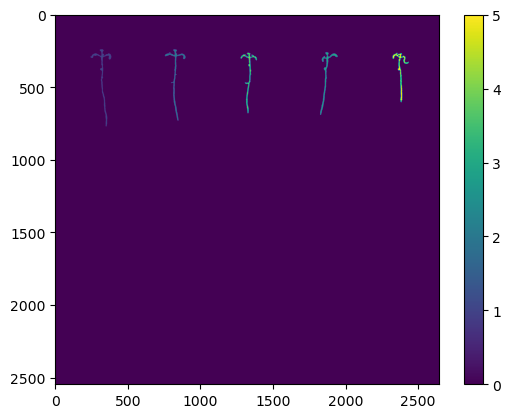

In [860]:
plt.imshow(labels)
plt.colorbar()

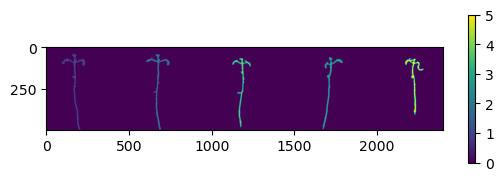

In [861]:
zoomed_im = labels[200:700, 150:2550]
plt.imshow(zoomed_im)
color_bar = plt.colorbar(shrink=0.4)

---

### Plant 2


In [862]:
plant_2 = cv2.cvtColor(plant_2, cv2.COLOR_BGR2GRAY)

In [863]:
plant_2 = cv2.medianBlur(plant_2, 5)

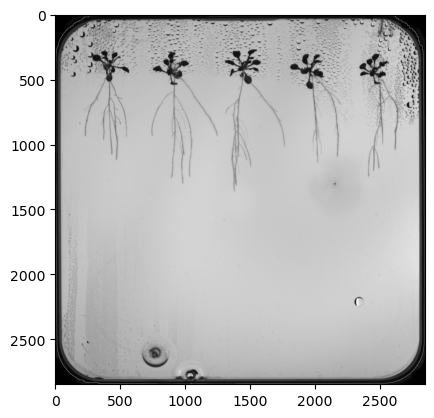

In [864]:
plt.imshow(plant_2, cmap='gray')

In [865]:
# # Opening
# kernel = np.ones((5, 5), dtype="uint8")
# plant_2 = cv2.erode(plant_2, kernel, iterations=1)
# plant_2 = cv2.dilate(plant_2, kernel, iterations=1)
# plt.imshow(plant_2, cmap='gray')

In [866]:
# plant_2 = cv2.erode(plant_2, kernel, iterations=1)

In [867]:
# plant_2 = cv2.dilate(plant_2, kernel, iterations=1)
# plant_2 = cv2.erode(plant_2, kernel, iterations=1)

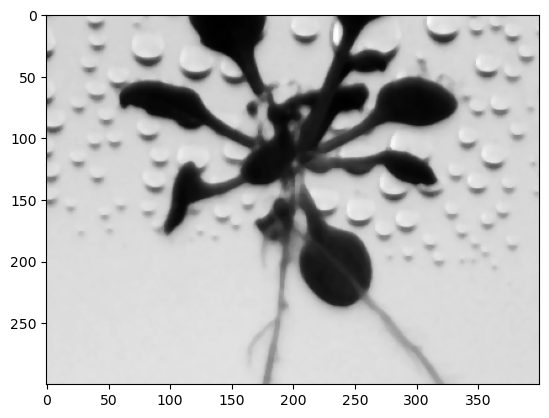

In [868]:
zoomed_im = plant_2[300:600, 1250:1650]
plt.imshow(zoomed_im, cmap='gray')

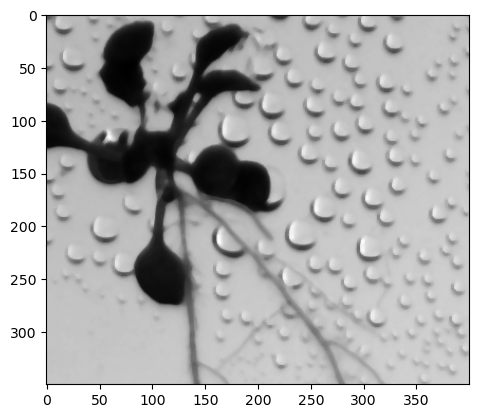

In [869]:
zoomed_im = plant_2[300:650, 1850:2250]
plt.imshow(zoomed_im, cmap='gray')

In [870]:
plant_2 = plant_2[100:-200, 100:-100]


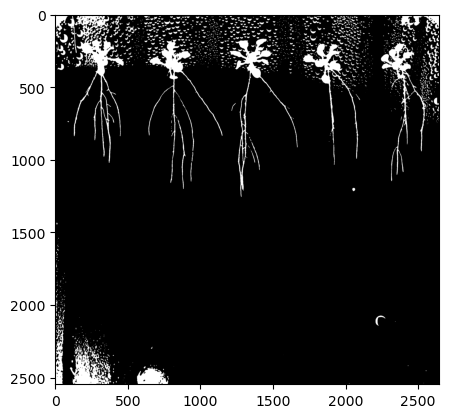

In [871]:
th, thresholded = cv2.threshold(plant_2, 165, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresholded, cmap='gray')

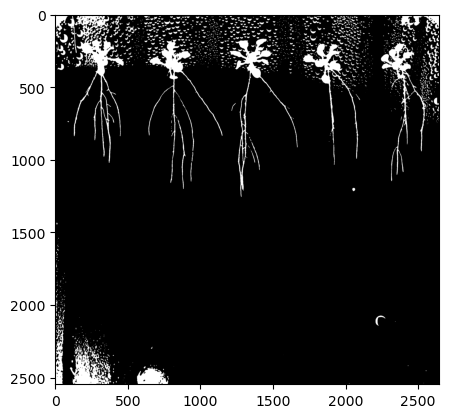

In [872]:
plt.imshow(thresholded, cmap='gray')

In [873]:
retval, labels = cv2.connectedComponents(thresholded)

In [874]:
retval

1728

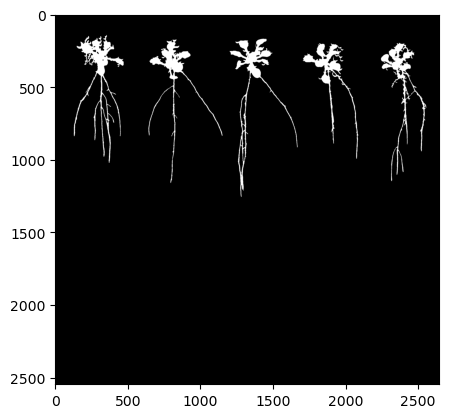

In [875]:
# Filter connected components to keep only the five largest objects
sizes = [np.sum(labels == i) for i in range(1, retval)]
largest_indices = np.argsort(sizes)[::-1][:5]  # Indices of the largest five components

# Create a mask to select only the five largest components on the thresholded image
mask_thresholded = np.zeros_like(thresholded, dtype=np.uint8)
for idx in largest_indices:
    mask_thresholded[labels == idx + 1] = 255  # Set pixels belonging to the five largest components to white

# Apply the mask to the thresholded image
masked_thresholded = cv2.bitwise_and(thresholded, thresholded, mask=mask_thresholded)

plt.imshow(masked_thresholded, cmap='gray')


In [876]:
retval, labels = cv2.connectedComponents(masked_thresholded)

In [877]:
retval

6

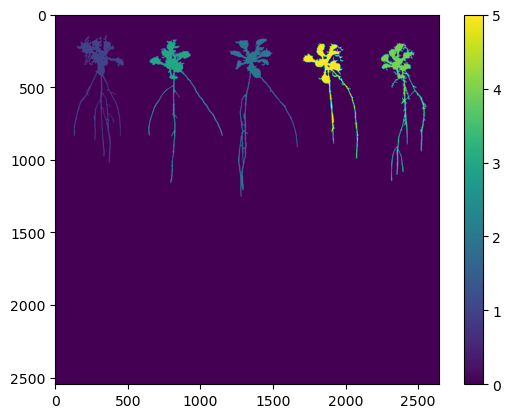

In [878]:
plt.imshow(labels)
plt.colorbar()

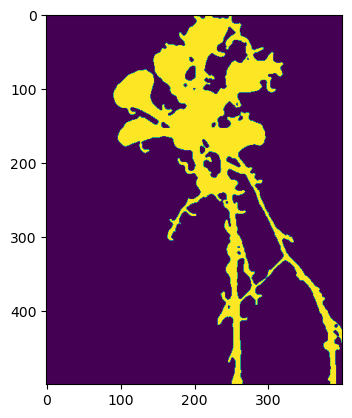

In [879]:
zoomed_im = labels[200:700, 2150:2550]
plt.imshow(zoomed_im)

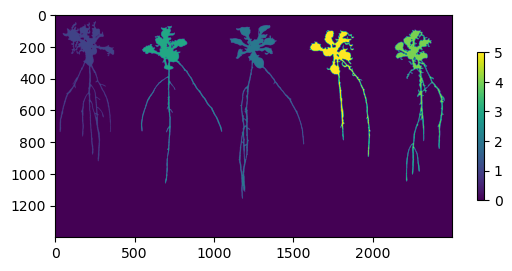

In [880]:
zoomed_im = labels[100:1500, 100:2600]
plt.imshow(zoomed_im)
color_bar = plt.colorbar(shrink=0.4)

---

### Plant 1 and 2 

(2847, 2847, 3)


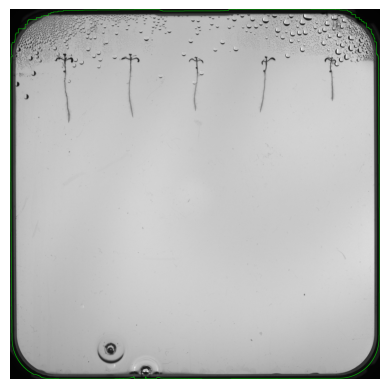

(2847, 2847, 3)


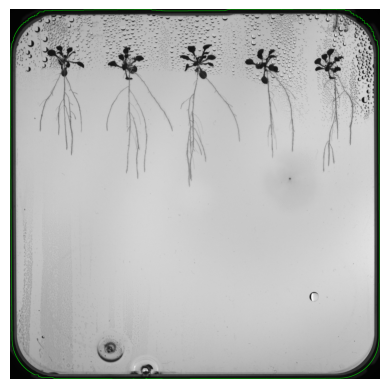

In [881]:
plant_1 = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task3\Plants\plants_1.png")
plant_2 = cv2.imread(r"C:\Users\domin\Desktop\Year 2 Block B\2023-24b-fai2-adsai-DominikSzewczyk224180\1. Computer Vision\Task3\Plants\plants_2.png")
plant_1 = show_cropped_square(plant_1)
plant_2 = show_cropped_square(plant_2)

In [882]:
plant_1 = cv2.cvtColor(plant_1, cv2.COLOR_BGR2GRAY)
plant_2 = cv2.cvtColor(plant_2, cv2.COLOR_BGR2GRAY)

In [883]:
plant_1 = cv2.medianBlur(plant_1, 5)
plant_2 = cv2.medianBlur(plant_2, 5)

In [884]:
plant_1 = plant_1[230:-300, 200:-130]
plant_2 = plant_2[230:-300, 200:-130]

In [885]:
# th, thresholded_1 = cv2.threshold(plant_1, 165, 255, cv2.THRESH_BINARY_INV)

In [886]:
# plt.imshow(thresholded_1, cmap='gray')

In [887]:
# retval, labels = cv2.connectedComponents(thresholded_1)

In [888]:
th, thresholded_1 = cv2.threshold(plant_1, 165, 255, cv2.THRESH_BINARY_INV)
th, thresholded_2 = cv2.threshold(plant_2, 165, 255, cv2.THRESH_BINARY_INV)


In [889]:
retval_1, labels_1 = cv2.connectedComponents(thresholded_1)
retval, labels = cv2.connectedComponents(thresholded_2)

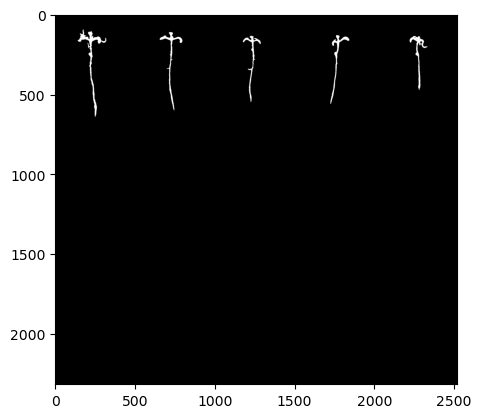

In [890]:
# Filter connected components to keep only the five largest objects
sizes = [np.sum(labels_1 == i) for i in range(1, retval_1)]
largest_indices = np.argsort(sizes)[::-1][:5]  # Indices of the largest five components

# Create a mask to select only the five largest components on the thresholded image
mask_thresholded = np.zeros_like(thresholded_1, dtype=np.uint8)
for idx in largest_indices:
    mask_thresholded[labels_1 == idx + 1] = 255  # Set pixels belonging to the five largest components to white

# Apply the mask to the thresholded image
masked_thresholded_1 = cv2.bitwise_and(thresholded_1, thresholded_1, mask=mask_thresholded)

plt.imshow(masked_thresholded_1, cmap='gray')

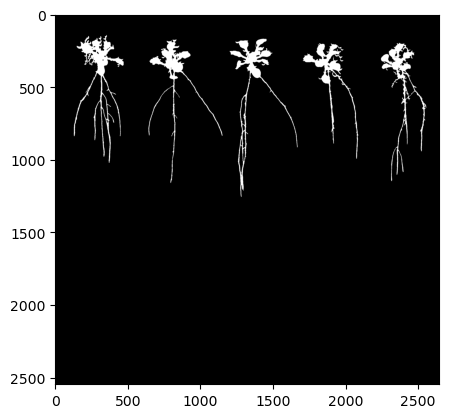

In [891]:
# Filter connected components to keep only the five largest objects
sizes = [np.sum(labels == i) for i in range(1, retval)]
largest_indices = np.argsort(sizes)[::-1][:5]  # Indices of the largest five components

# Create a mask to select only the five largest components on the thresholded image
mask_thresholded = np.zeros_like(thresholded_2, dtype=np.uint8)
for idx in largest_indices:
    mask_thresholded[labels == idx + 1] = 255  # Set pixels belonging to the five largest components to white

# Apply the mask to the thresholded image
masked_thresholded_2 = cv2.bitwise_and(thresholded_2, thresholded_2, mask=mask_thresholded)

plt.imshow(masked_thresholded, cmap='gray')

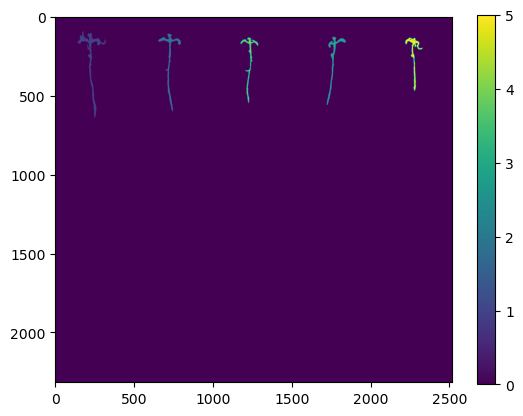

In [892]:
retval, labels = cv2.connectedComponents(masked_thresholded_1)
plt.imshow(labels)
plt.colorbar()

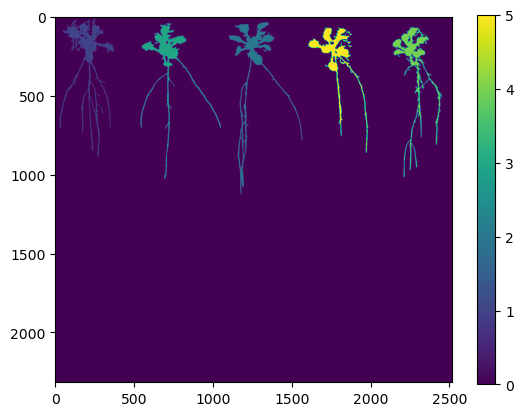

In [893]:
retval, labels = cv2.connectedComponents(masked_thresholded_2)
plt.imshow(labels)
plt.colorbar()